<a href="https://colab.research.google.com/github/hugorocha05/IrisEDA/blob/main/IrisKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Iris Dataset

In [2]:
iris = load_iris(as_frame=True)
df = iris.frame

# Add target name instead of 0, 1, 2
df["flower"] = [iris.target_names[i] for i in iris.target]
df = df.drop("target", axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Train/Test Split

In [3]:
# This splits the data into subsets, one for training the model and the other for evaluating its performance

X = df.drop("flower", axis=1)
y = df["flower"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # stratify=y ensures class proportions are preserved in train and test sets

print(X_test)
print()
print(y_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
107                7.3               2.9                6.3               1.8
63                 6.1               2.9                4.7               1.4
133                6.3               2.8                5.1               1.5
56                 6.3               3.3                4.7               1.6
127                6.1               3.0                4.9               1.8
140                6.7               3.1                5.6               2.4
53                 5.5               2.3                4.0               1.3
69                 5.6               2.5                3.9               1.1
20                 5.4               3.4                1.7               0.2
141                6.9               3.1                5.1               2.3
14                 5.8               4.0                1.2               0.2
38                 4.4               3.0                1.3     

# Feature Scaling

In [4]:
# Scaling is the process of transforming features so they're on the same scale, thus ensuring fair comparison between features
# This is very important for distance-based models (like KNN)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

for i in range(len(X_test.head())):
  print(f"{i+1}\nNormal: {X_test.iloc[i].values}\nScaled: {X_test_scaled[i]}\n")

1
Normal: [7.3 2.9 6.3 1.8]
Scaled: [ 2.07292879 -0.42469145  1.51460381  0.84857614]

2
Normal: [6.1 2.9 4.7 1.4]
Scaled: [ 0.44355245 -0.42469145  0.58413048  0.29715482]

3
Normal: [6.3 2.8 5.1 1.5]
Scaled: [ 0.71511517 -0.68648754  0.81674881  0.43501015]

4
Normal: [6.3 3.3 4.7 1.6]
Scaled: [0.71511517 0.62249294 0.58413048 0.57286548]

5
Normal: [6.1 3.  4.9 1.8]
Scaled: [ 0.44355245 -0.16289535  0.70043965  0.84857614]



# Fitting the Model

In [5]:
# This is where the model would usually be trained with the training data, but since KNN works at runtime, all we're really doing is storing the data so it can be used later

knn = KNeighborsClassifier(n_neighbors=5)  # KNN hyperparameter that determines how many neighbors are considered in the classification
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# Making Predictions with the Model

In [6]:
y_pred = knn.predict(X_test_scaled)

for i in range(len(y_pred[:10])):
  print(f"{i+1}. {y_pred[i]}")

1. virginica
2. versicolor
3. virginica
4. versicolor
5. virginica
6. virginica
7. versicolor
8. versicolor
9. setosa
10. virginica


# Evaluating the Model

## Comparing the Values

In [7]:
for i in range(len(y_pred)):
  print(f"{i+1}.\nPrediction: {y_pred[i]}\nAnswer: {y_test.iloc[i]}\n")

1.
Prediction: virginica
Answer: virginica

2.
Prediction: versicolor
Answer: versicolor

3.
Prediction: virginica
Answer: virginica

4.
Prediction: versicolor
Answer: versicolor

5.
Prediction: virginica
Answer: virginica

6.
Prediction: virginica
Answer: virginica

7.
Prediction: versicolor
Answer: versicolor

8.
Prediction: versicolor
Answer: versicolor

9.
Prediction: setosa
Answer: setosa

10.
Prediction: virginica
Answer: virginica

11.
Prediction: setosa
Answer: setosa

12.
Prediction: setosa
Answer: setosa

13.
Prediction: virginica
Answer: virginica

14.
Prediction: virginica
Answer: virginica

15.
Prediction: setosa
Answer: setosa

16.
Prediction: virginica
Answer: virginica

17.
Prediction: versicolor
Answer: versicolor

18.
Prediction: setosa
Answer: setosa

19.
Prediction: setosa
Answer: setosa

20.
Prediction: setosa
Answer: setosa

21.
Prediction: versicolor
Answer: versicolor

22.
Prediction: setosa
Answer: setosa

23.
Prediction: versicolor
Answer: versicolor

24.
Pred

## Classification Report and Accuracy Score

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [9]:
print(accuracy_score(y_test, y_pred))

0.9555555555555556


## Confusion Matrix

In [10]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


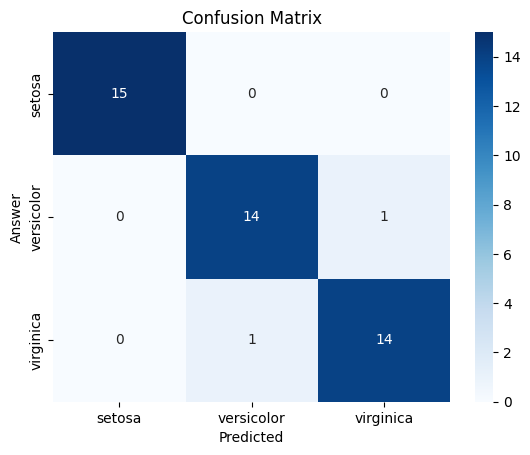

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", xticklabels= iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Answer")
plt.title("Confusion Matrix")
plt.show()

# Using Petal Length x Petal Width

As observed in the EDA of the Iris dataset, petal length and petal width are the pair of features that best separate the classes. With that in mind, let's see if fitting the model with only these two features makes it better or worse.

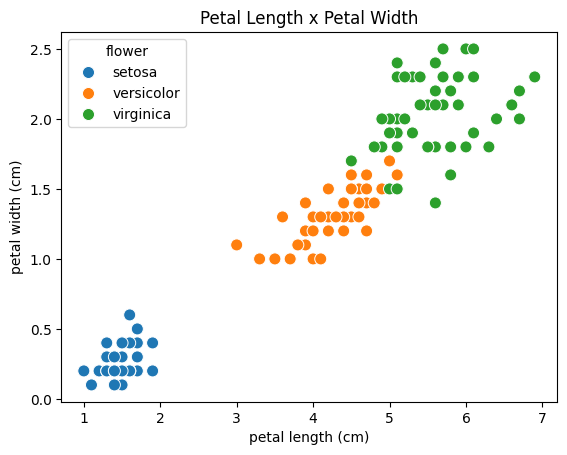

In [12]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="flower", s=75)
plt.title("Petal Length x Petal Width")
plt.show()

## Separating and Scaling the Data

In [13]:
X_petal = df[["petal length (cm)", "petal width (cm)"]]
y = df["flower"]

X_petal_train, X_petal_test, y_train, y_test = train_test_split(X_petal, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_petal_train_scaled = scaler.fit_transform(X_petal_train)
X_petal_test_scaled = scaler.fit_transform(X_petal_test)

## Fitting and Evaluating the Model

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)  # KNN hyperparameter that determines how many neighbors are considered in the classification
knn.fit(X_petal_train_scaled, y_train)

y_pred = knn.predict(X_petal_test_scaled)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


# Tuning k with Cross-Validation

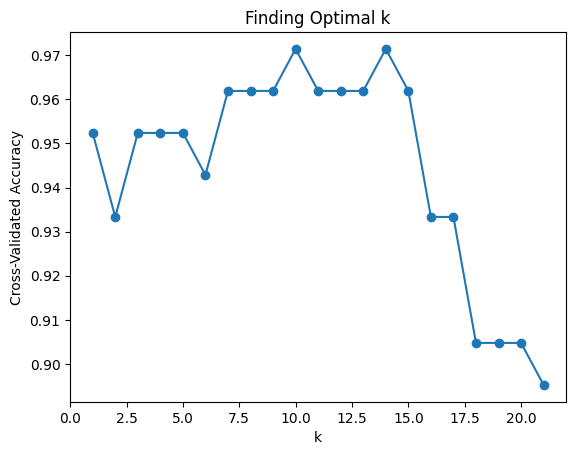

In [15]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 22)
scores = []

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
  scores.append(cv_score)

plt.plot(k_values, scores, marker="o")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Finding Optimal k")
plt.show()

## Using Tuned k

In [16]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


In [17]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

0.9111111111111111


# Conclusion

Here are some observations and conclusions that can be taken from this experiment:
1. Overall, the K-Nearest Neighbors model achieved a good result in classifying the Iris dataset, with an initial accuracy of around 96%.
2. The classification report highlighted the model's excellent performance on the 'setosa' class, achieving 100% precision, recall, and f1-score.
3. As anticipated, the 'versicolor' and 'virginica' classes showed slightly lower performance, with a few instances of misclassification between them, which is expected due to their similar characteristics as observed in the EDA.
4. Interestingly, using only the 'petal length (cm)' and 'petal width (cm)' features, which were visually identified as highly discriminative, did not significantly change the model's performance compared to using all features.
5. While cross-validation was used to tune the 'k' hyperparameter, the tuned model resulted in a slightly lower accuracy than the initial model with k=5. This can sometimes occur if the optimal 'k' found through cross-validation on the training set does not generalize perfectly to the specific instances in the test set, or if the test set itself contains some challenging samples. Despite this, the model still performed well, demonstrating the effectiveness of KNN for this dataset.
6. The Confusion Matrix visualization using a heatmap provided a clear and intuitive way to see exactly where the misclassifications occurred, visually confirming the overlap between 'versicolor' and 'virginica'.
7. Finally, the experiment showcased the simplicity of the KNN algorithm and its ease of implementation, making it a practical choice for initial classification tasks.